In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets, svm, model_selection, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = datasets.load_digits()

In [3]:
target = dataset.target
features = dataset.images.reshape((len(dataset.images), -1))

In [4]:
target

array([0, 1, 2, ..., 8, 9, 8])

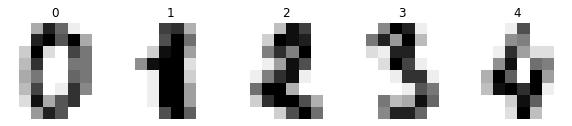

In [5]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 4))

for ax, img, label in zip(axes, dataset.images, target):
    ax.set_axis_off()
    ax.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('%i' % label)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3)

In [7]:
svm = svm.SVC()
svm.fit(x_train, y_train)

SVC()

In [8]:
y_pred = svm.predict(x_test)

In [9]:
print('Accuracy :', accuracy_score(y_test, y_pred))

Accuracy : 0.987037037037037


In [10]:
label_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
cmx = confusion_matrix(y_test, y_pred, labels=label_names)

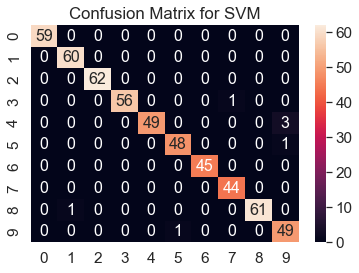

In [11]:
df_cm = pd.DataFrame(cmx)
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, annot_kws={'size':16})
plt.title("Confusion Matrix for SVM")
plt.show()